In [12]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14
plt.rcParams['figure.facecolor'] = '#00000000'
pd.pandas.set_option('display.max_columns',None)

In [13]:
data = pd.read_csv("./heart_failure_clinical_records_dataset.csv")

In [14]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [16]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [17]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [18]:
data.shape

(299, 13)

In [19]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [20]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [21]:
data['DEATH_EVENT'].value_counts()/len(data)*100

0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64

<AxesSubplot:>

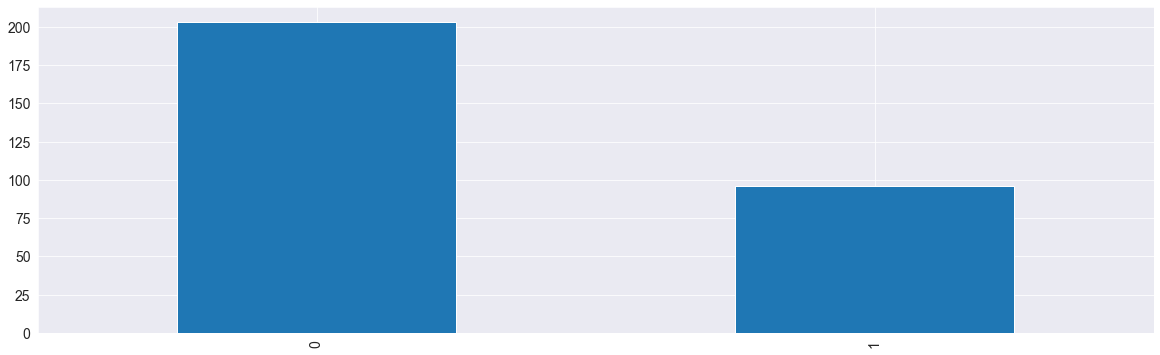

In [22]:
data.DEATH_EVENT.value_counts().plot.bar()

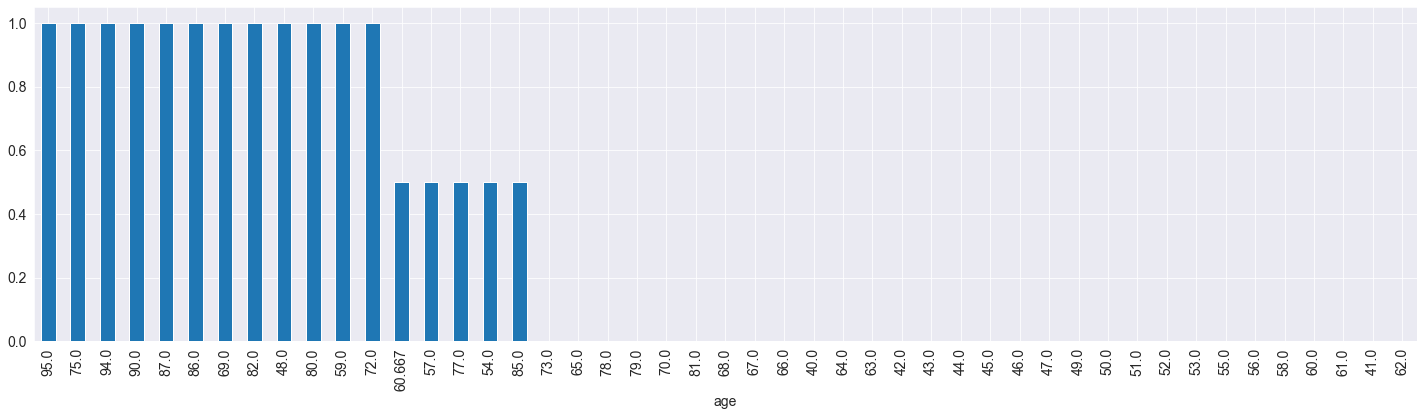

In [23]:
data.groupby(['age'])['DEATH_EVENT'].median().sort_values(ascending=False).plot.bar()
plt.tight_layout()

<AxesSubplot:>

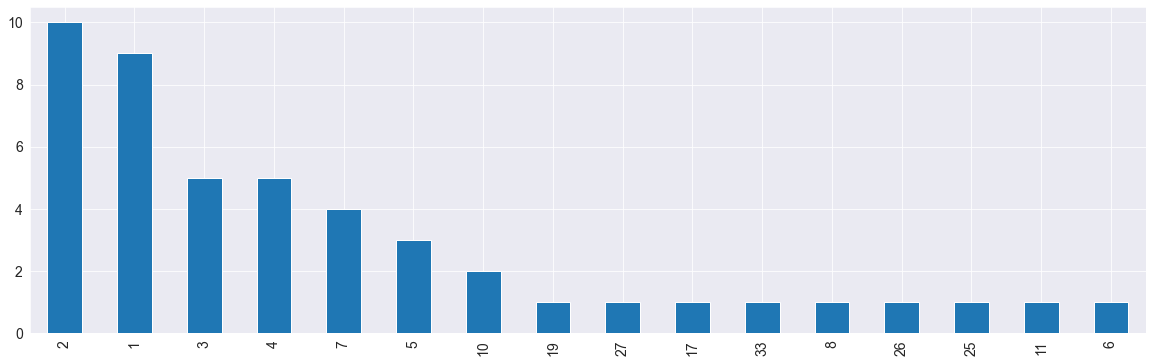

In [24]:
data['DEATH_EVENT'].groupby(data['age']).size().value_counts().plot.bar()

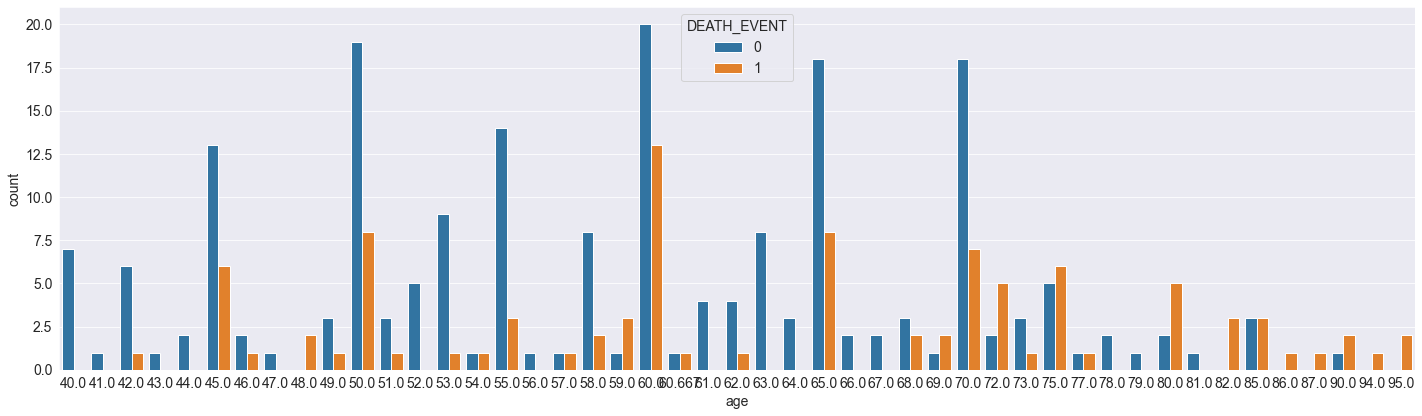

In [25]:
sns.countplot(x='age',data=data,hue='DEATH_EVENT')
plt.tight_layout()

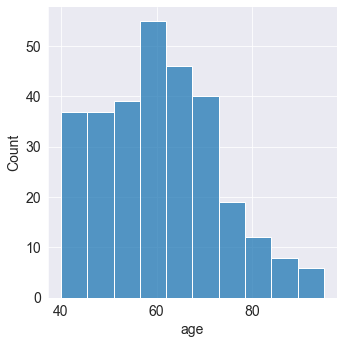

In [26]:
sns.displot(x= 'age',data=data)

In [27]:
discrete_features = [feature for feature in data.columns if data[feature].dtype == 'int64' and len(data[feature].unique())<100]

In [28]:
continuous_features = [feature for feature in data.columns if data[feature].dtype == 'float64' or feature not in discrete_features]

In [30]:
for i in continuous_features:
    print(i ,'Has Unique values= ', len(data[i].unique()))

age  Has Unique values =  47
creatinine_phosphokinase  Has Unique values =  208
platelets  Has Unique values =  176
serum_creatinine  Has Unique values =  40
time  Has Unique values =  148


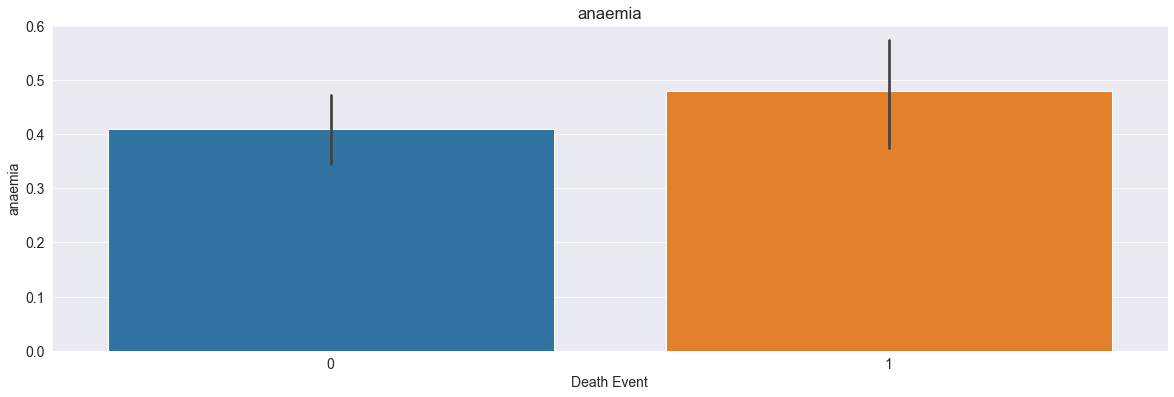

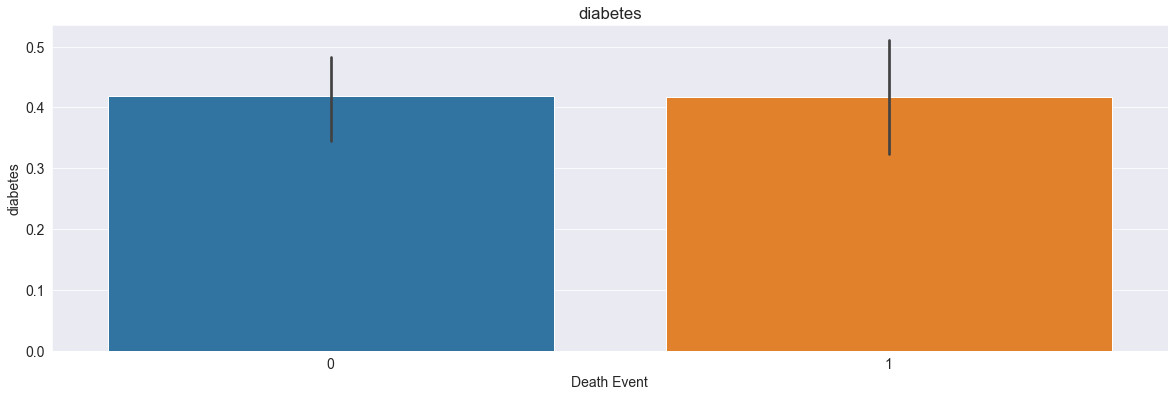

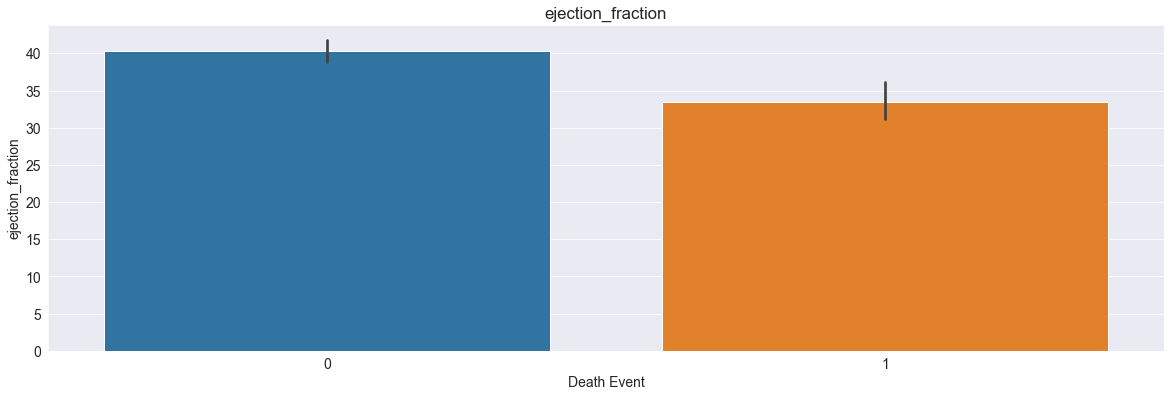

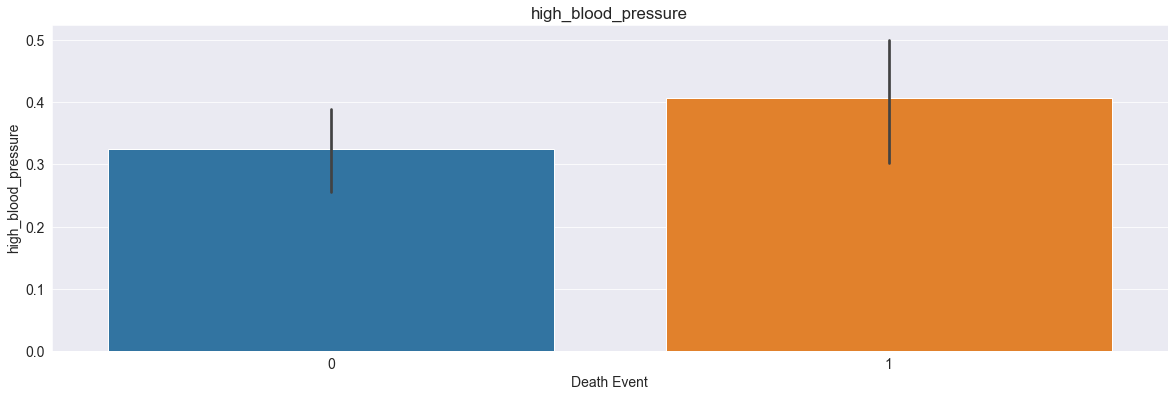

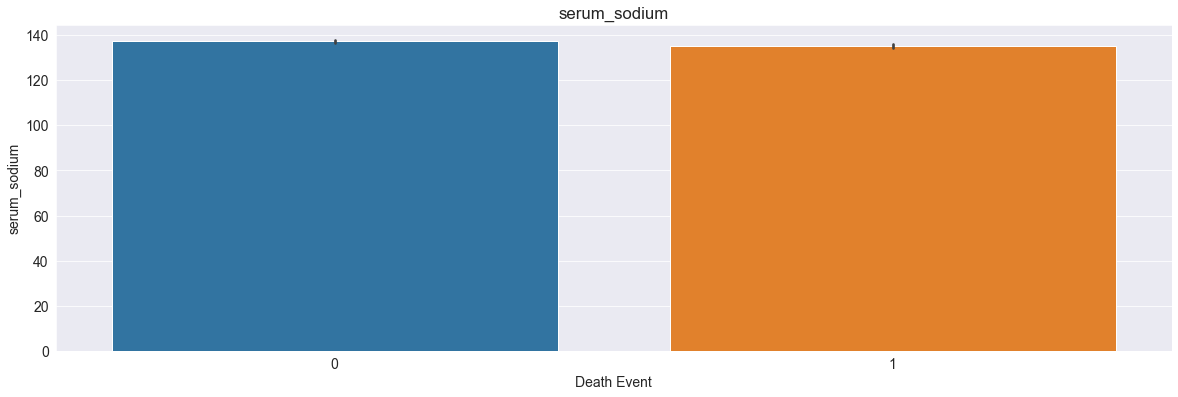

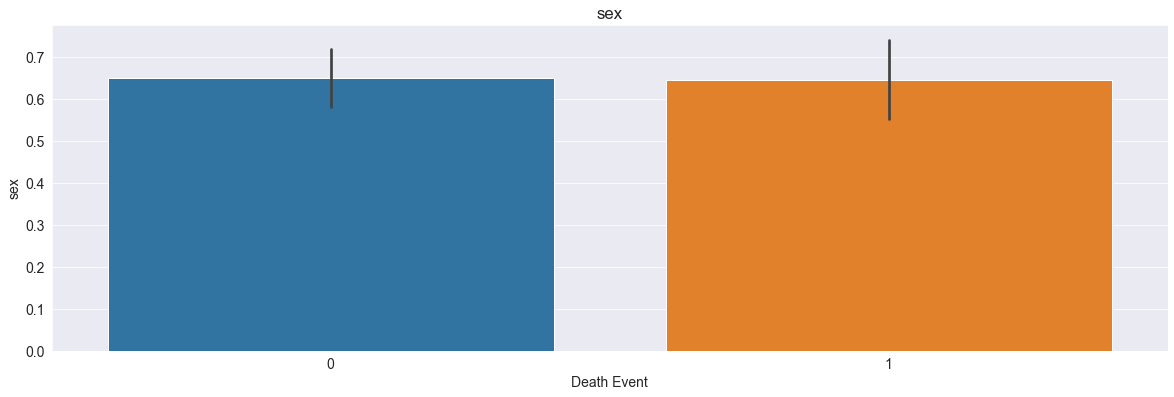

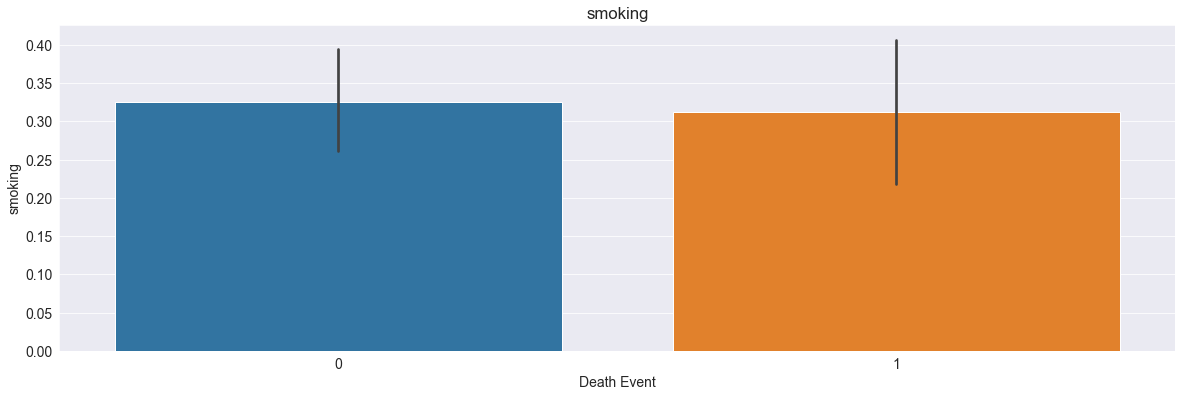

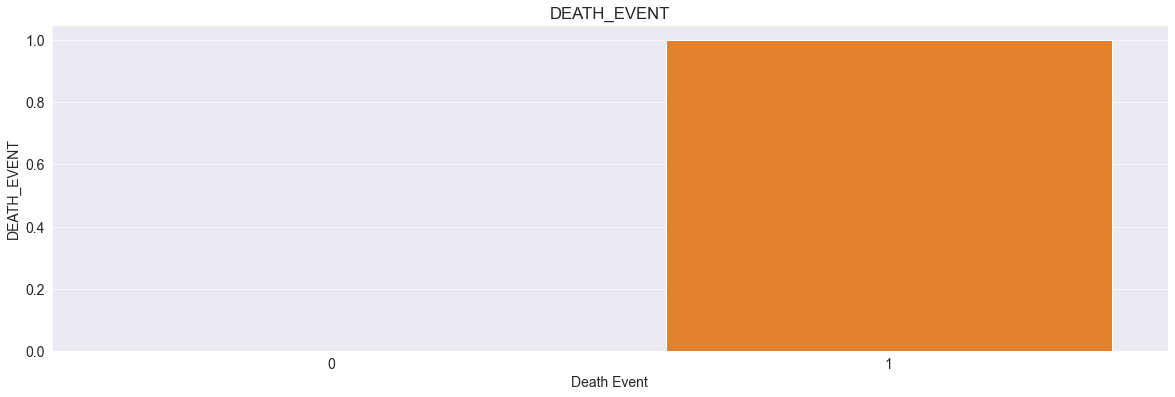

In [31]:
for feature in discrete_features:
    sns.barplot(y=feature,data=data,x='DEATH_EVENT')
    plt.title(feature)
    plt.xlabel('Death Event')
    plt.ylabel(feature)
    plt.show()

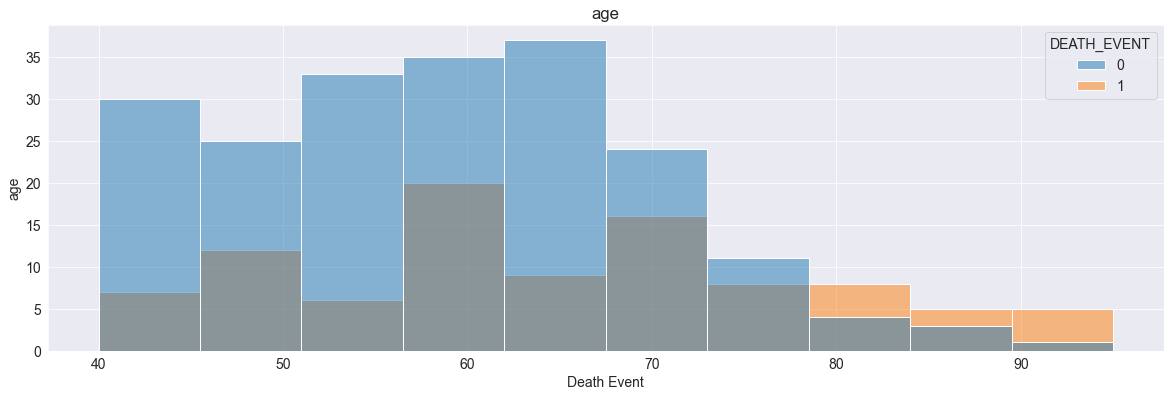

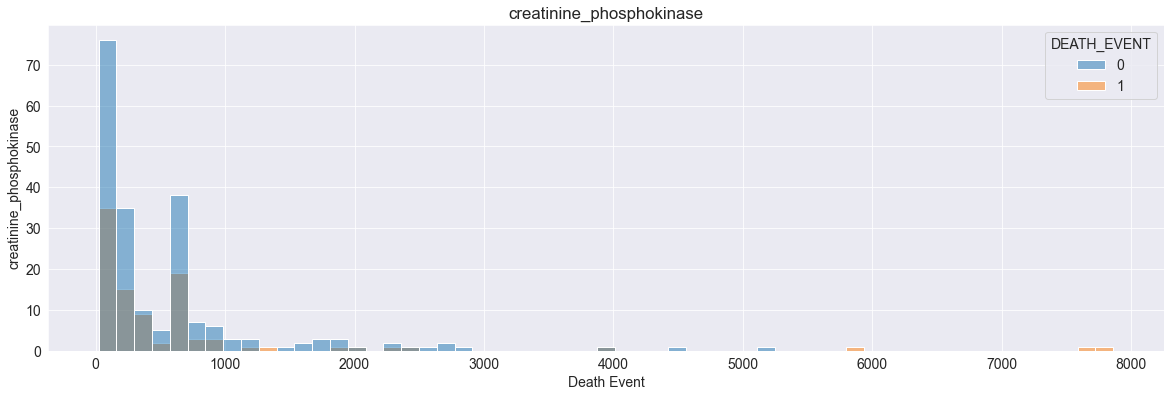

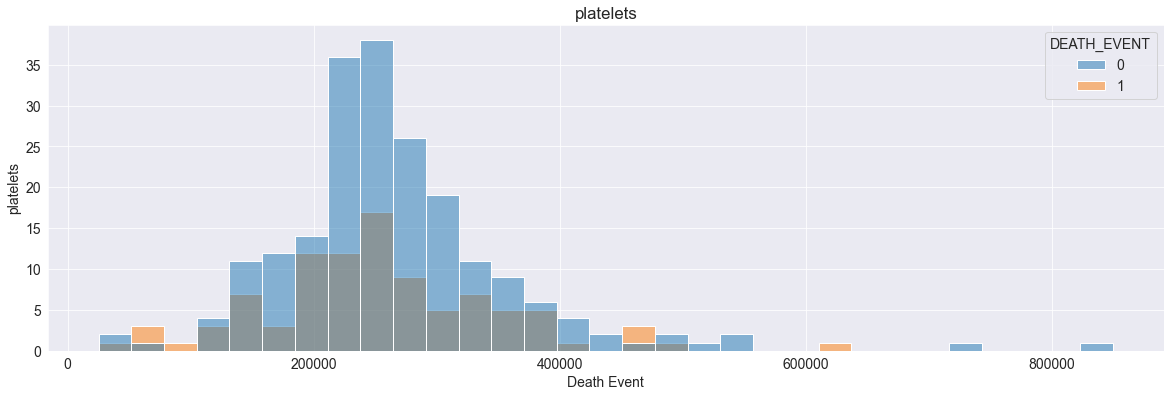

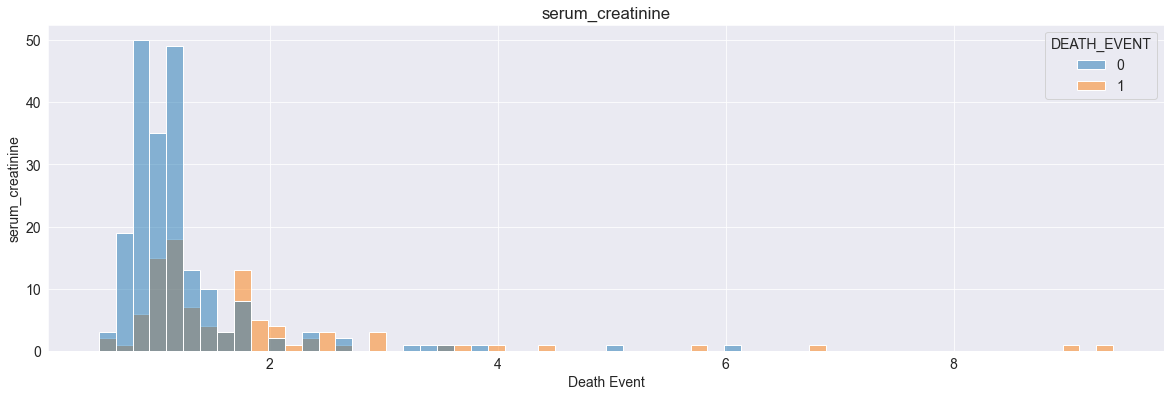

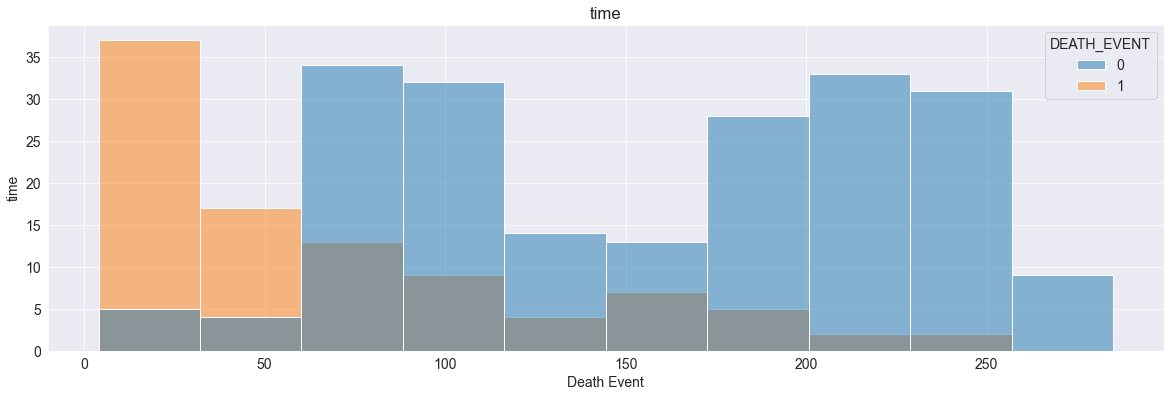

In [32]:
for feature in continuous_features:
    sns.histplot(x=feature,data=data,hue='DEATH_EVENT')
    plt.title(feature)
    plt.xlabel('Death_Event')
    plt.ylabel(feature)
    plt.show()

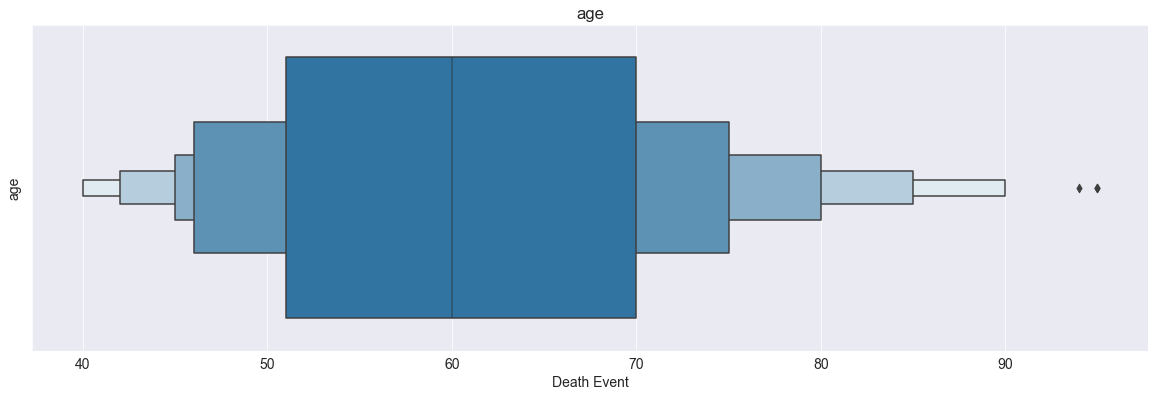

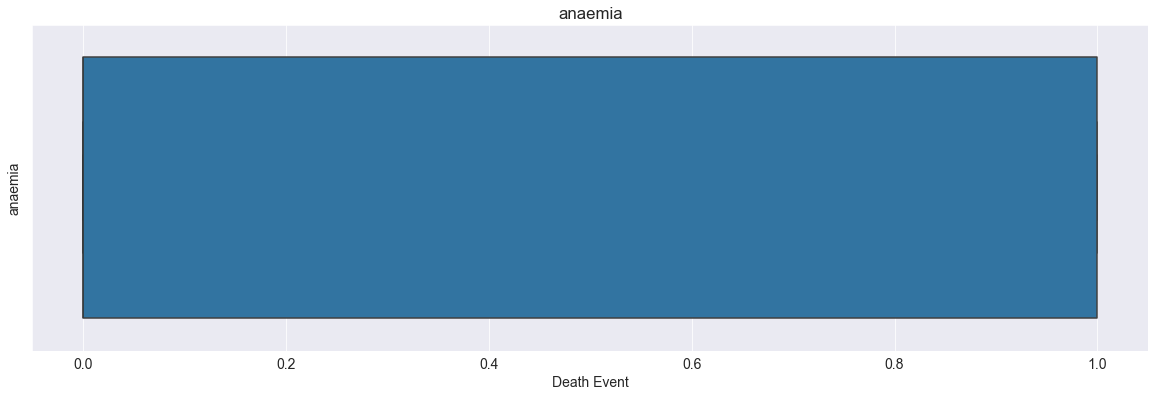

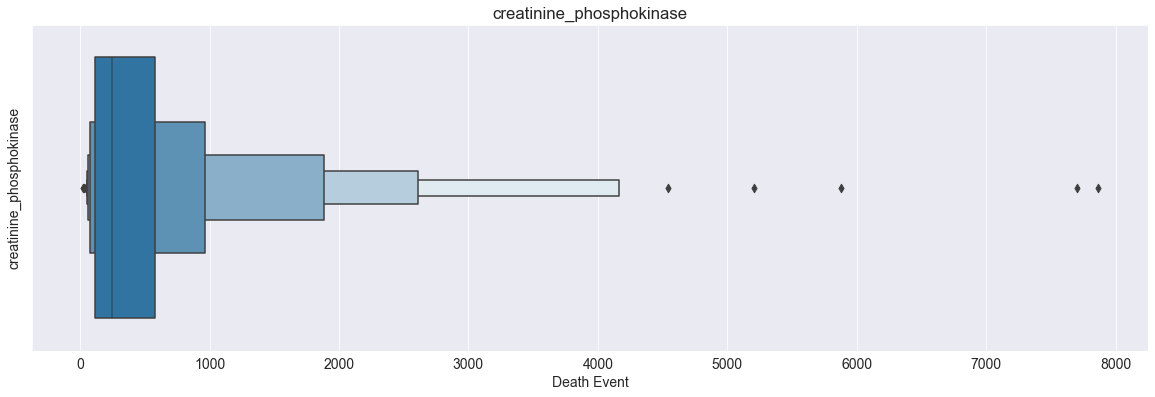

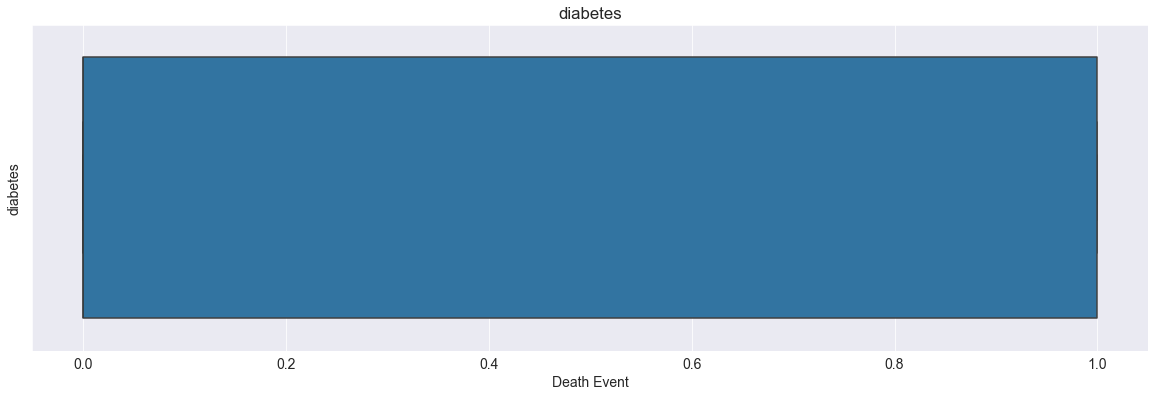

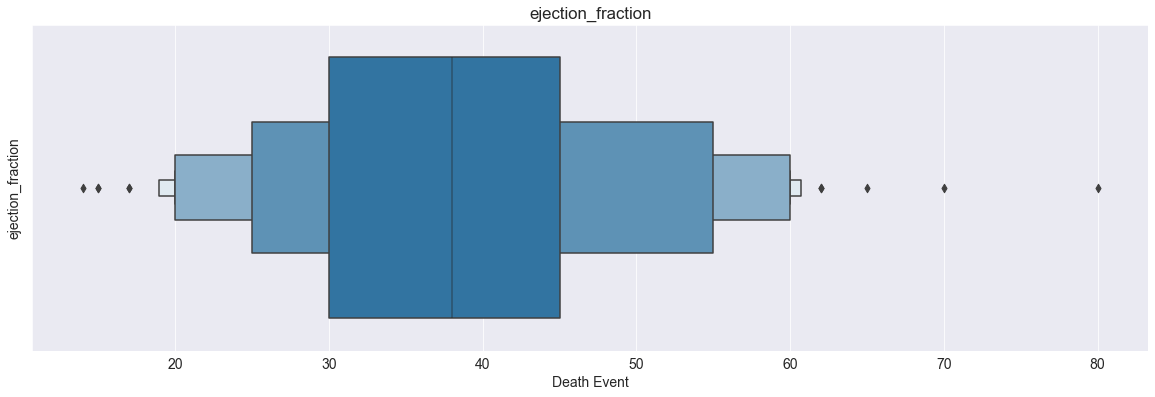

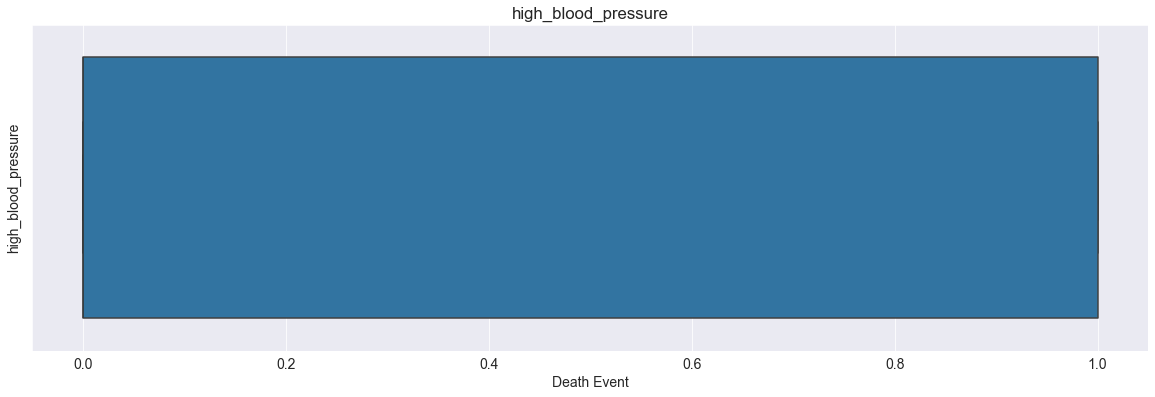

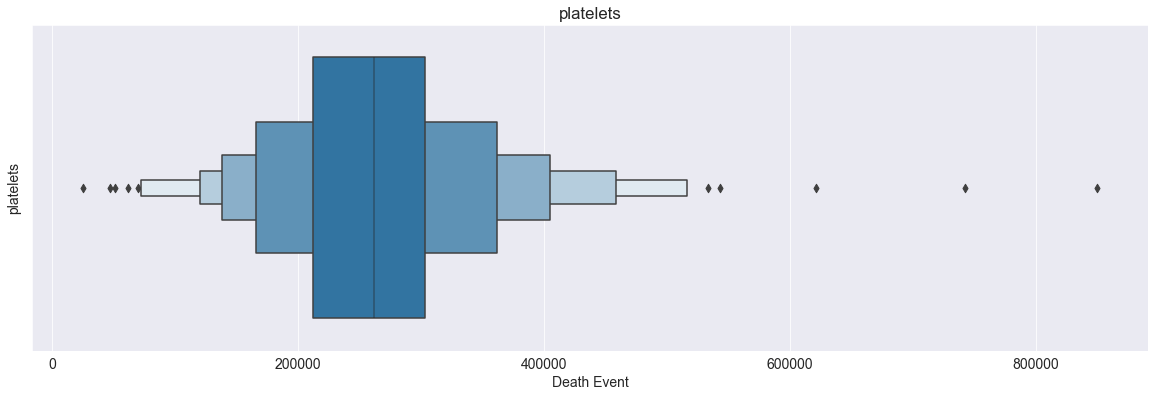

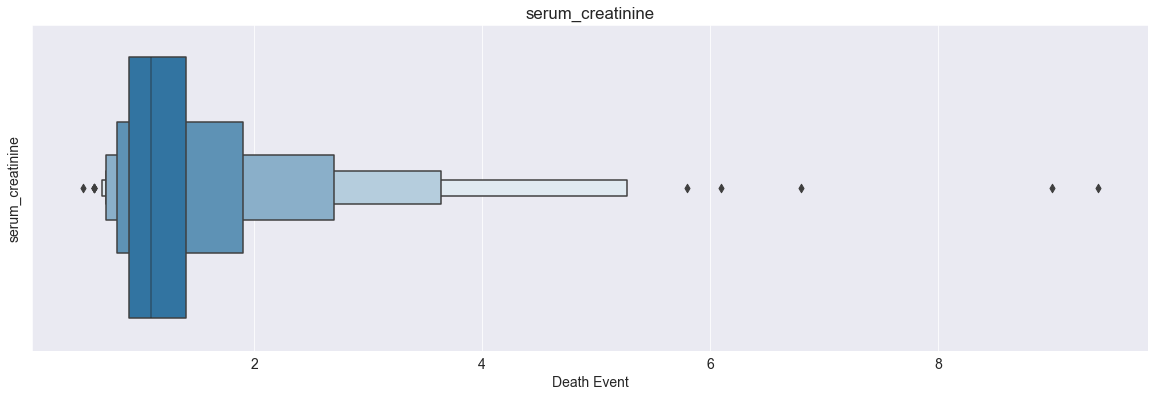

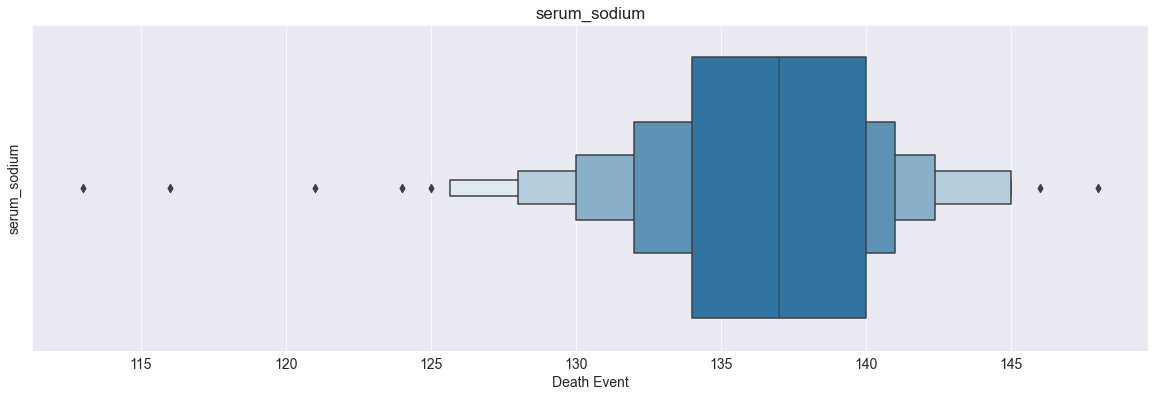

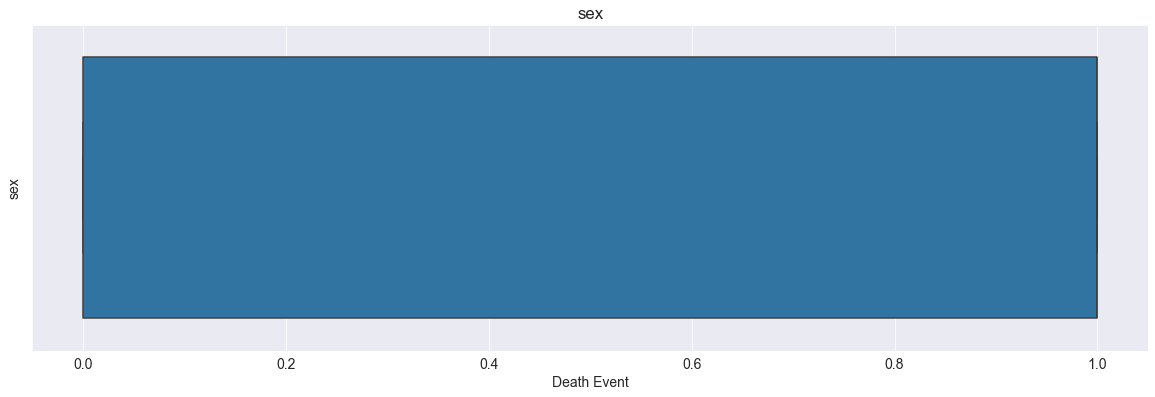

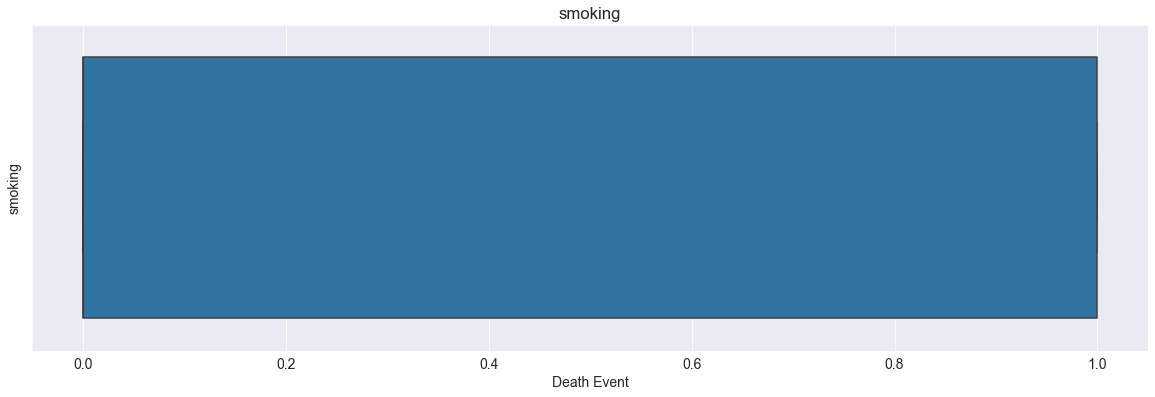

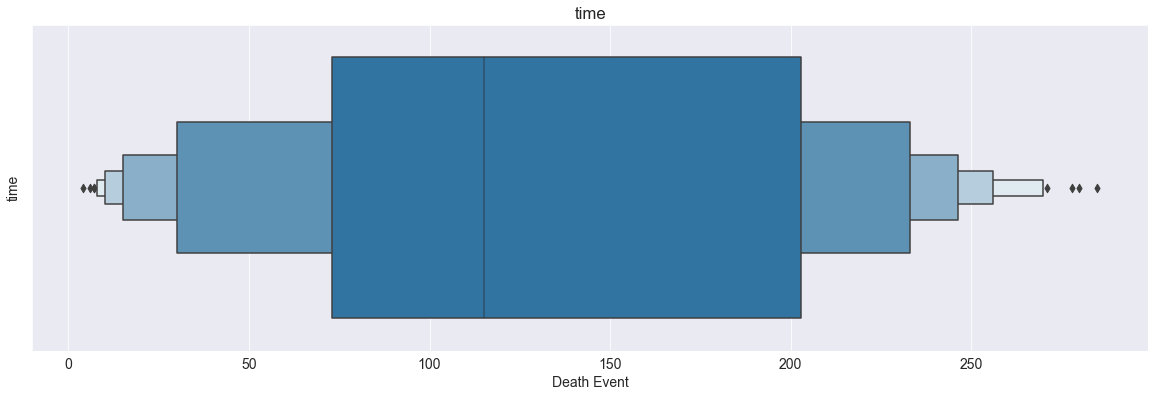

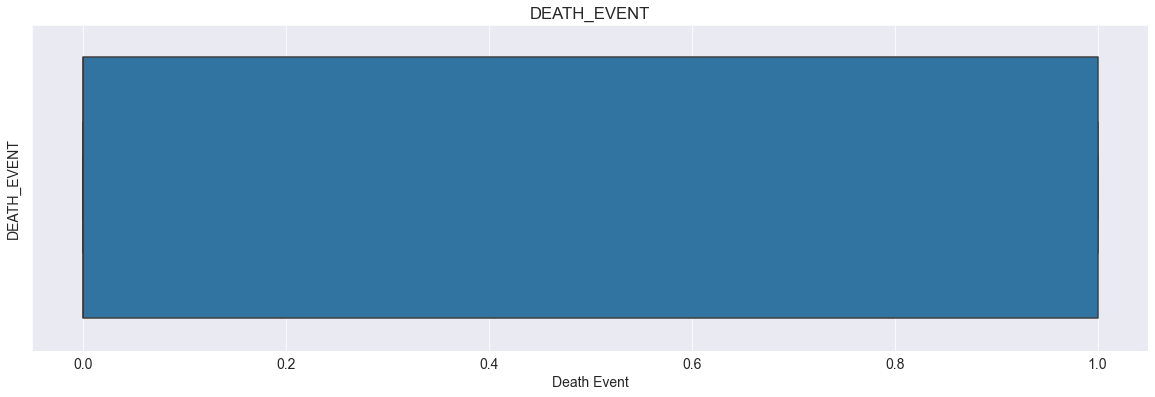

In [33]:
for feature in data.columns:
    sns.boxenplot(x=feature,data=data)
    plt.title(feature)
    plt.xlabel('Death_Event')
    plt.ylabel(feature)
    plt.show()

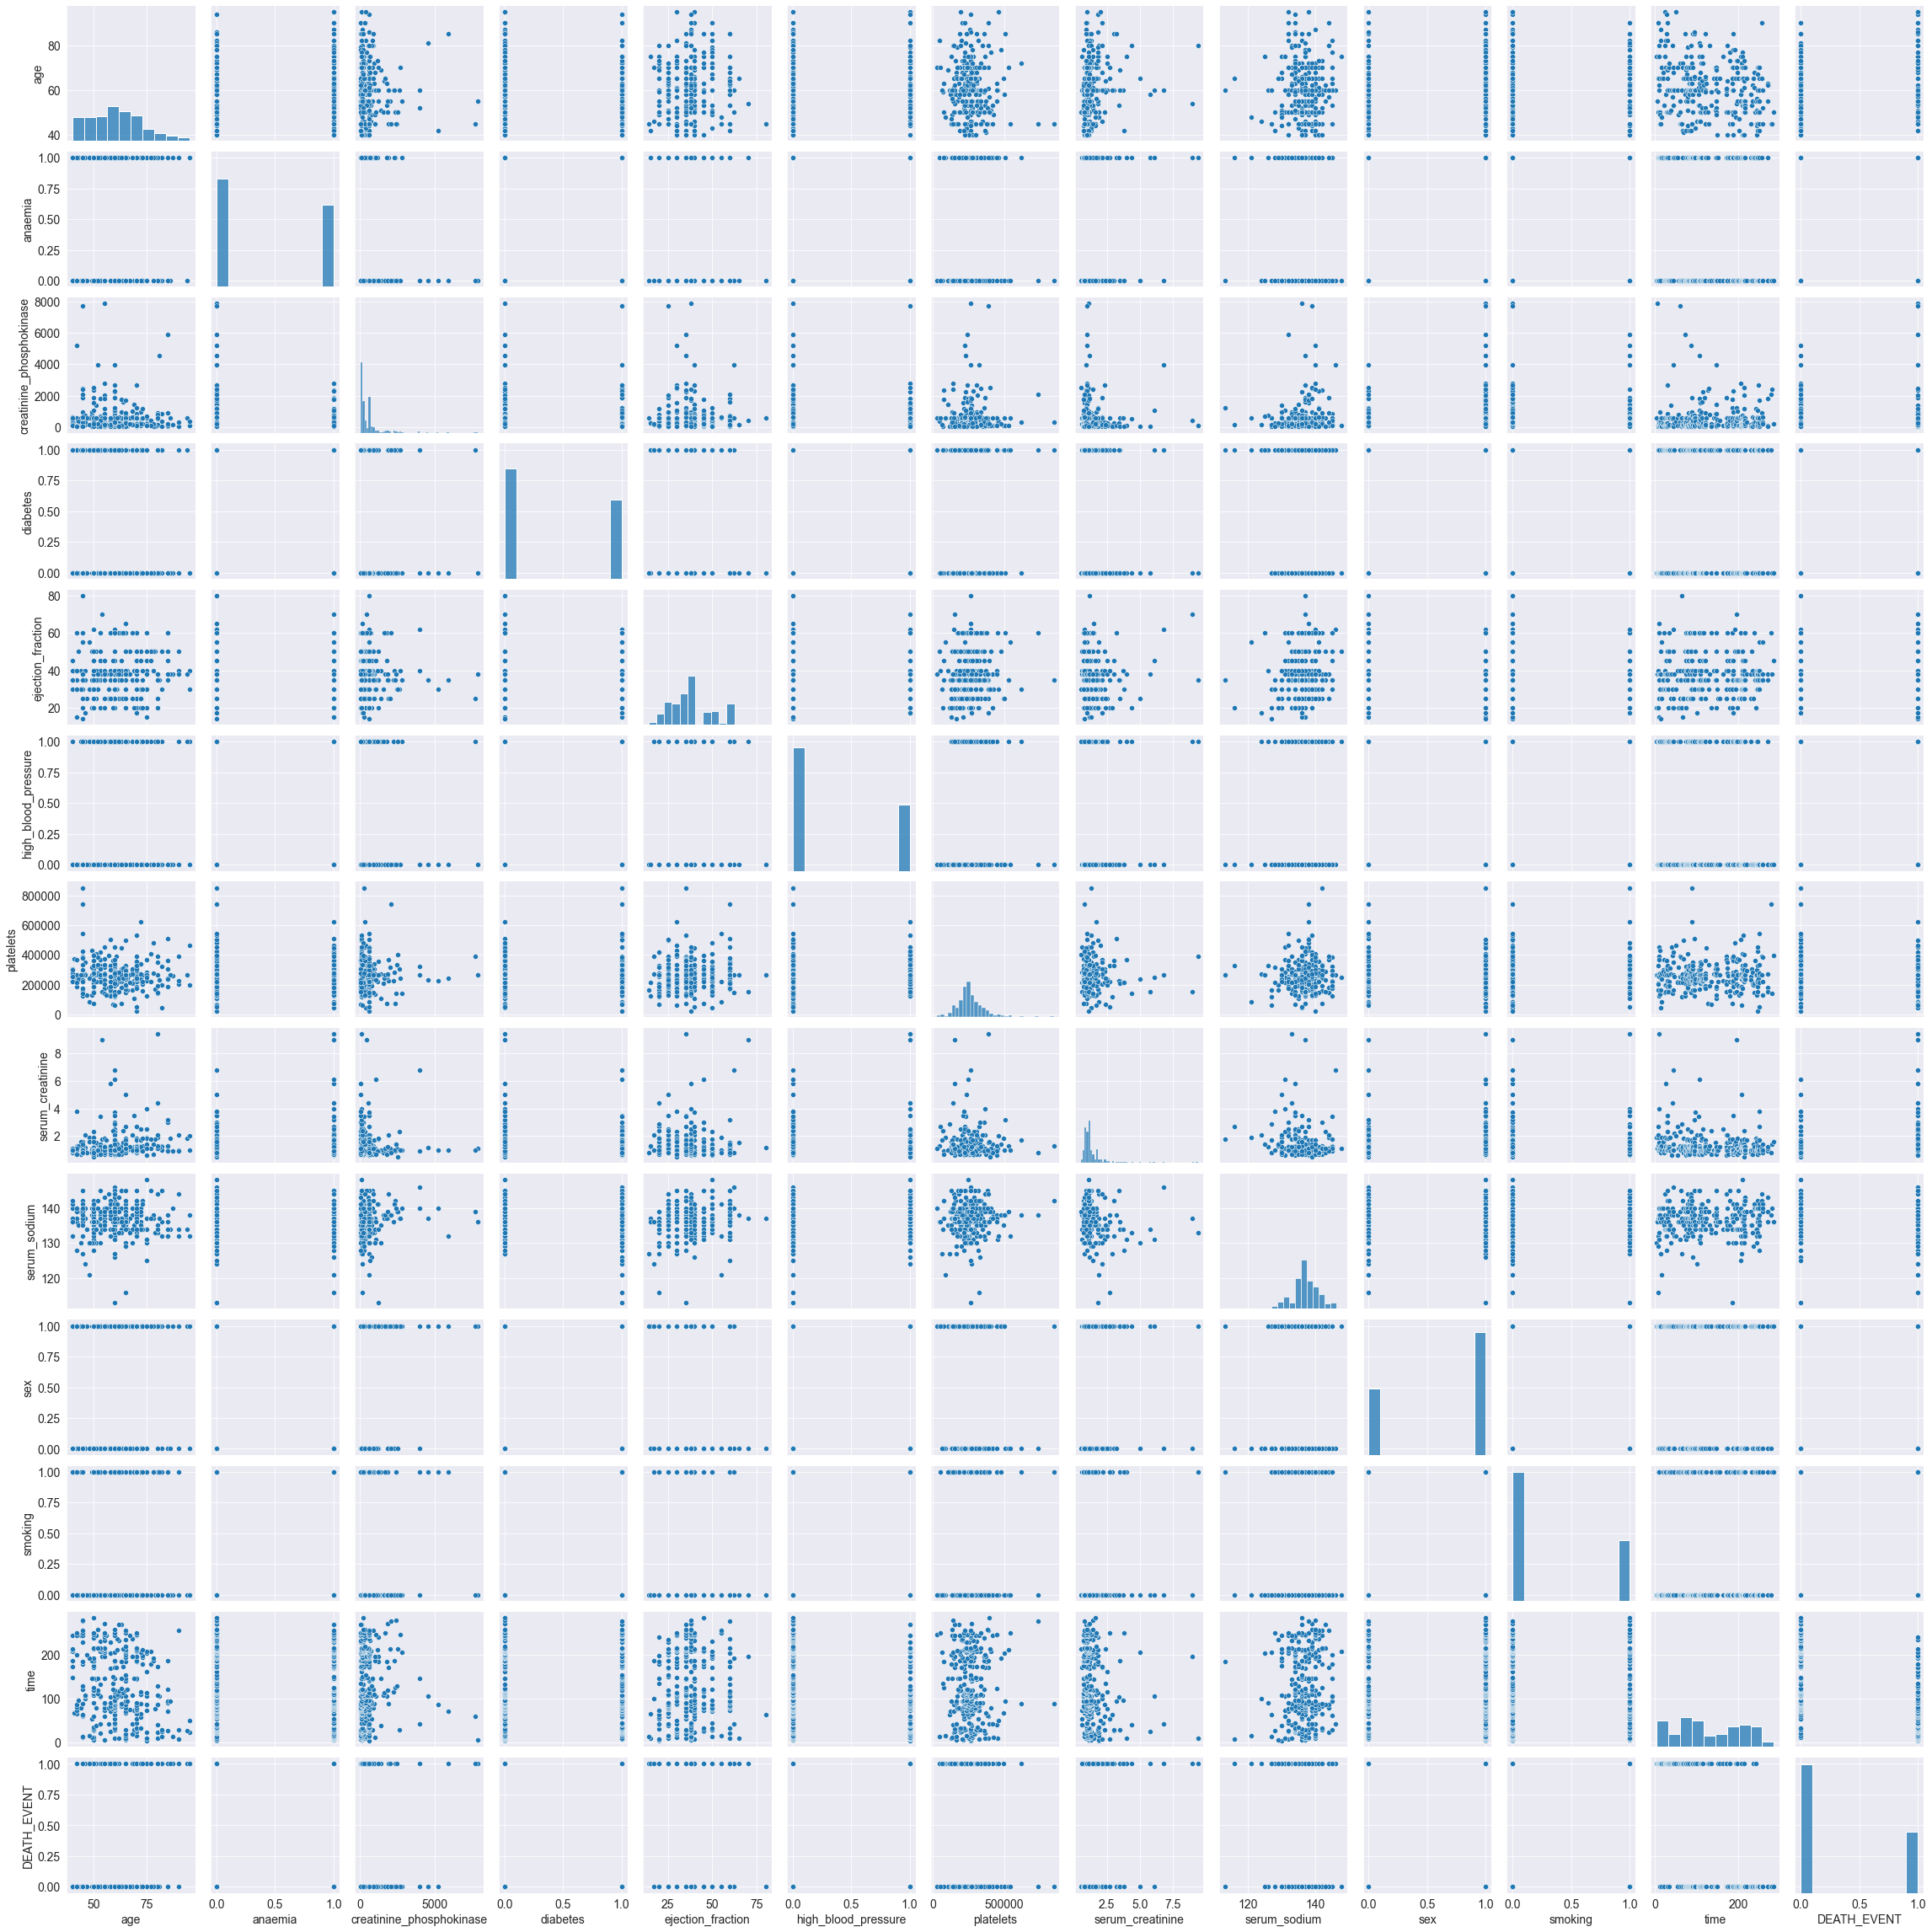

In [34]:
sns.pairplot(data)

<AxesSubplot:>

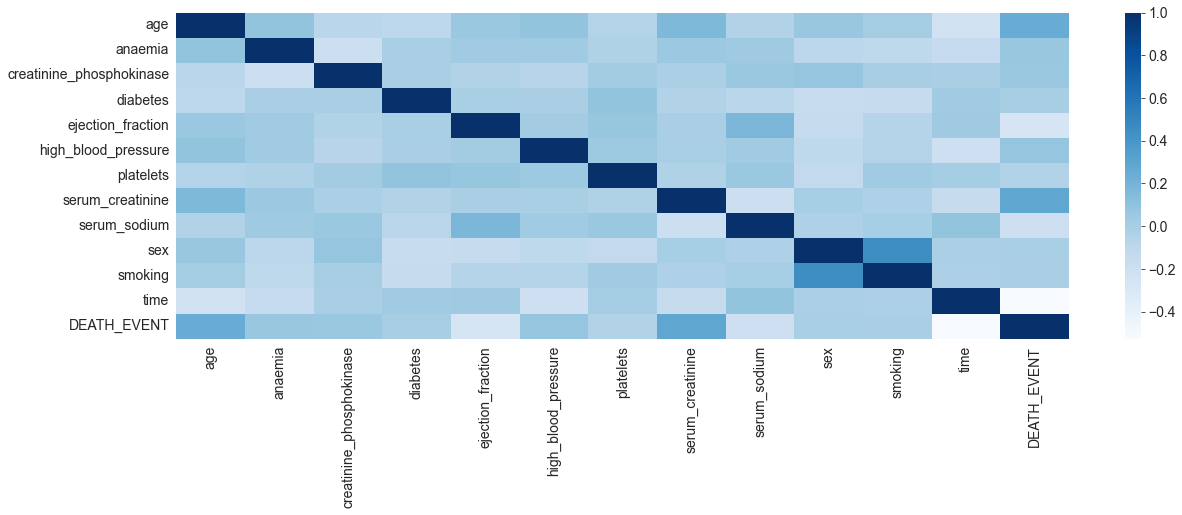

In [35]:

corr = data.corr()

sns.heatmap(corr,  cbar=True, cmap='Blues')

In [36]:
# Balancing of dataset
X= data.drop('DEATH_EVENT', axis=1)
y= data['DEATH_EVENT']

In [37]:
# Splitting of the dataset for training and testing of model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 12) (200,)
(99, 12) (99,)


In [39]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

smk = SMOTETomek(random_state=42)
X_train, y_train = smk.fit_resample(X_train, y_train)
X_test, y_test = smk.fit_resample(X_test, y_test)

In [40]:
cols = X_train.columns

In [41]:
data1 = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
data2 = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)
balanced_df = pd.concat([data1,data2], axis=0)

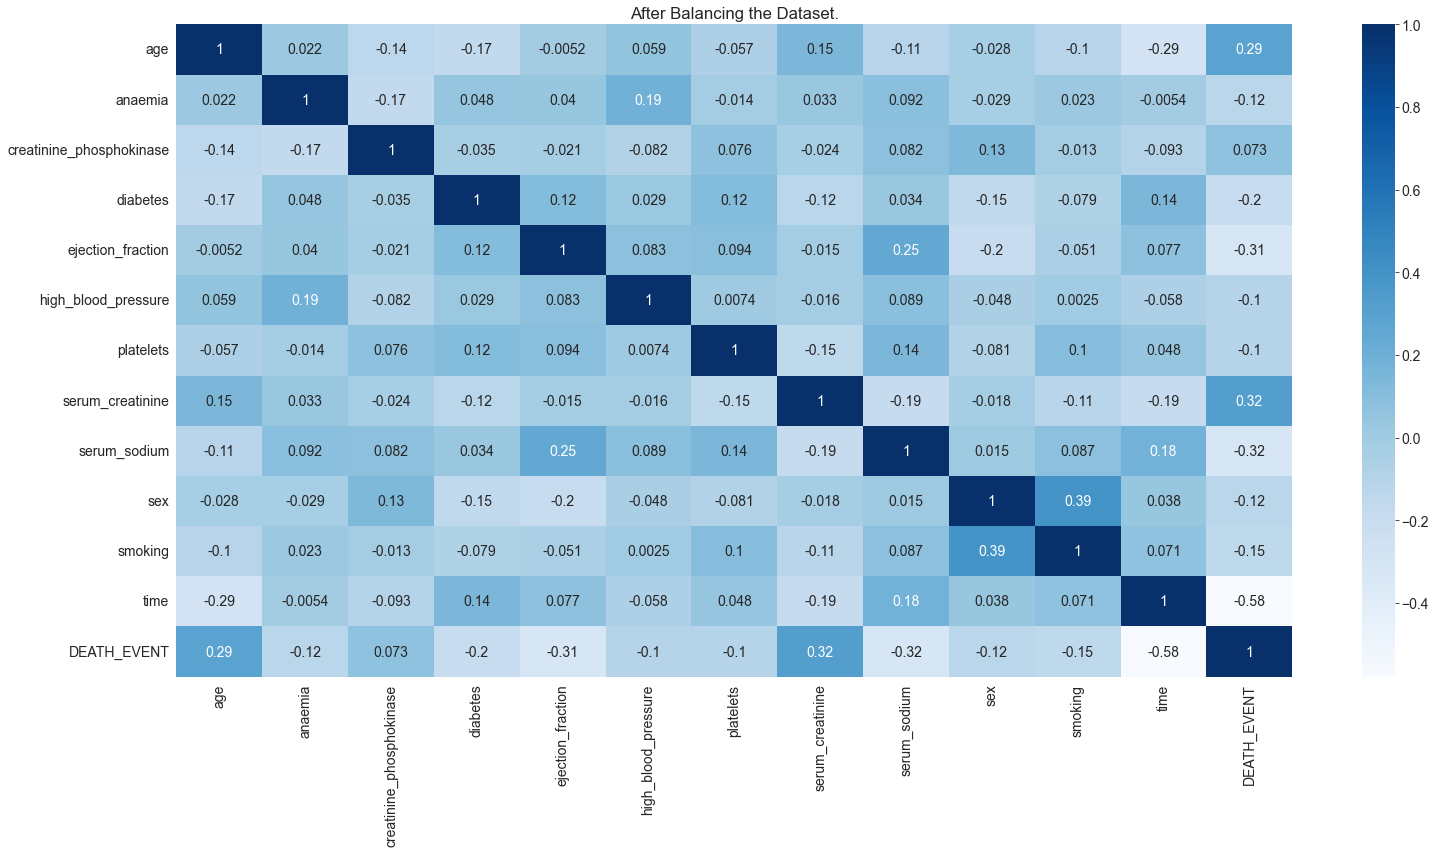

In [42]:
plt.figure(figsize=(25,12))
sns.heatmap(balanced_df.corr(),cbar=True,annot=True,cmap='Blues')
plt.title('After Balancing of Dataset')
plt.show()

In [43]:
balanced_df.DEATH_EVENT.value_counts()/len(data)*100

0    50.501672
1    50.501672
Name: DEATH_EVENT, dtype: float64

In [44]:
X=balanced_df.drop('DEATH_EVENT', axis=1)
y=balanced_df['DEATH_EVENT']

In [45]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.33,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(202, 12) (202,)
(100, 12) (100,)


In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
classifier=Sequential()

In [48]:
classifier.add(Dense(units=6,activation='relu',kernel_initializer='he_normal',input_dim = 12))
classifier.add(Dense(units=5,activation='relu',kernel_initializer='he_normal'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [49]:
classifier.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=tf.keras.metrics.BinaryAccuracy())

In [50]:
model_history = classifier.fit(X_train,y_train,batch_size=10,validation_split=0.30,epochs=50)

Epoch 1/50
15/15 [==============================] - 3s 38ms/step - loss: 0.7696 - binary_accuracy: 0.4823 - val_loss: 0.9411 - val_binary_accuracy: 0.3607
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.7511 - binary_accuracy: 0.5035 - val_loss: 0.9069 - val_binary_accuracy: 0.4426
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.7363 - binary_accuracy: 0.5177 - val_loss: 0.8846 - val_binary_accuracy: 0.4590
Epoch 4/50
15/15 [==============================] - 0s 12ms/step - loss: 0.7256 - binary_accuracy: 0.5461 - val_loss: 0.8664 - val_binary_accuracy: 0.4590
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 0.7143 - binary_accuracy: 0.5745 - val_loss: 0.8433 - val_binary_accuracy: 0.4754
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 0.7042 - binary_accuracy: 0.5745 - val_loss: 0.8252 - val_binary_accuracy: 0.4754
Epoch 7/50
15/15 [==============================] - 0s 12ms/step - loss: 

In [51]:
print(model_history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


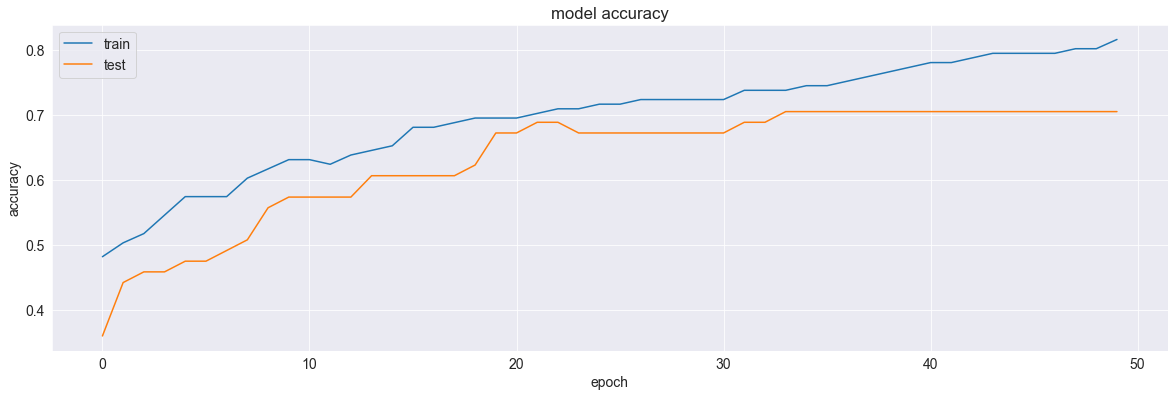

In [52]:
# summarize history for accuracy
plt.plot(model_history.history['binary_accuracy'])
plt.plot(model_history.history['val_binary_accuracy'])

plt.title('Accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train data','Test data'], loc='upper left')
plt.show()

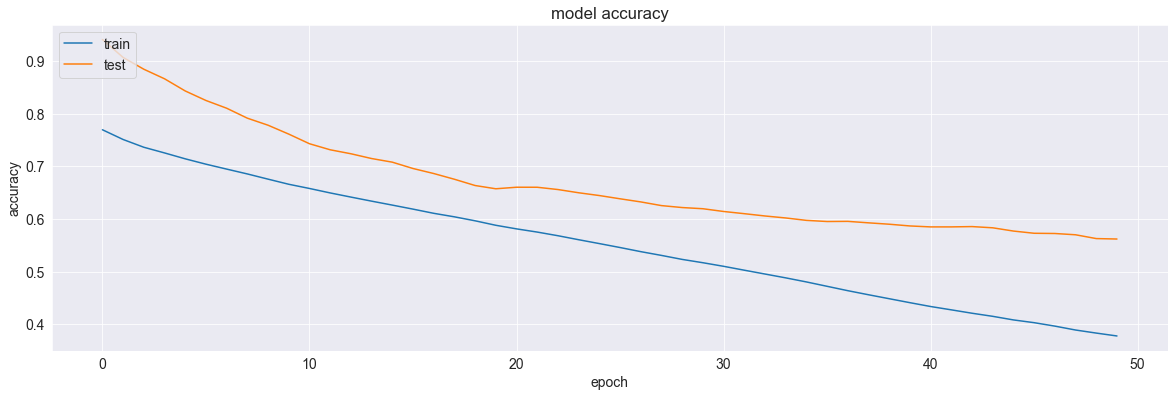

In [53]:
# summarization of history for evaluating the accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train data','test data'], loc='upper left')
plt.show()

In [54]:
y_pred= classifier.predict(X_test)
y_pred = y_pred>0.5

4/4 [==============================] - 0s 3ms/step


In [55]:
#  Confusion matrix for model evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculation of the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [56]:
# Confusion matrix
print(cm)

print(score)

[[44 18]
 [11 27]]
0.71


In [57]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        62
           1       0.60      0.71      0.65        38

    accuracy                           0.71       100
   macro avg       0.70      0.71      0.70       100
weighted avg       0.72      0.71      0.71       100

